## Creating Time-Series Charts

In [4]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt install openpyxl

In [108]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [114]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/misc/'
filename = 'ndvi_data.xlsx'
download(data_url + filename)

### Data Pre-Processing

In [32]:
filepath = os.path.join(data_folder, filename)
df = pd.read_excel(filepath)
df

,Sensor,Date,NDVI
0,Modis,2019-01-01,0.345
1,Modis,2019-01-02,0.352
2,Modis,2019-01-03,0.352
3,Modis,2019-01-04,0.364
4,Modis,2019-01-05,0.369
...,...,...,...
1371,Sentinel-2,2021-12-04,0.097
1372,Sentinel-2,2021-12-09,0.096
1373,Sentinel-2,2021-12-19,0.096
1374,Sentinel-2,2021-12-24,0.096


We set the 'Date' column as the index of the dateframe. This will allow us to filter and plot the time-series data easily.

In [66]:
df = df.set_index('Date')
df

,Sensor,NDVI
Date,,
2019-01-01,Modis,0.345
2019-01-02,Modis,0.352
2019-01-03,Modis,0.352
2019-01-04,Modis,0.364
2019-01-05,Modis,0.369
...,...,...
2021-12-04,Sentinel-2,0.097
2021-12-09,Sentinel-2,0.096
2021-12-19,Sentinel-2,0.096


The dataframe contains time-series from 2 differnet sensors. Filter them to separate dataframes.

In [74]:
modis_df = df[df['Sensor'] == 'Modis']
landsat_df = df[df['Sensor'] == 'Landsat']
sentinel_df = df[df['Sensor'] == 'Sentinel-2']

Create a chart with time-series of all 3 sensors. We use `mdates` module to control the tick-marks on X-Axis.

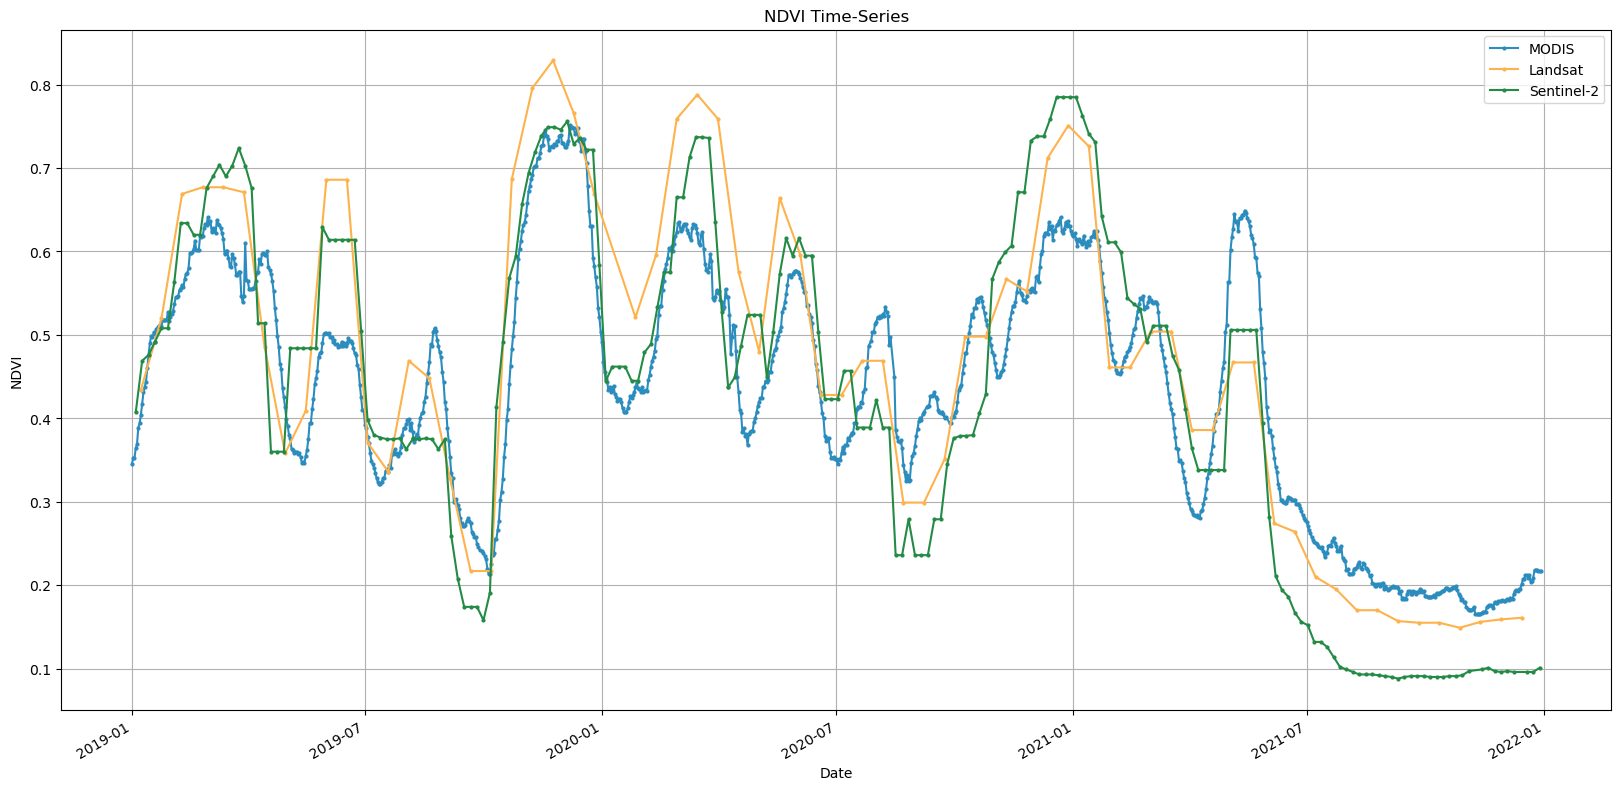

In [112]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
modis_df.plot(y='NDVI', kind='line', ax=ax, 
              marker='o', markersize=2, color='#2b8cbe',
              label='MODIS')
landsat_df.plot(y='NDVI', kind='line', ax=ax, 
                marker='o', markersize=2, color='#feb24c',
                label='Landsat')
sentinel_df.plot(y='NDVI', kind='line', ax=ax,
                 marker='o', markersize=2, color='#238b45',
                 label='Sentinel-2')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax.grid('on')
ax.set_title('NDVI Time-Series')
ax.set_ylabel('NDVI')

# Save the plot
output_folder = 'output'
output_path = os.path.join(output_folder, 'ndvi_time_series.png')
plt.savefig(output_path)

plt.show()

### Time Series Smoothing with Moving Average

Pandas has built-in method `rolling()` to allow us to compute moving averages. Let's smooth the time-series with a moving-window average.

In [103]:
window_size_days = 16
window = '{}D'.format(window_size_days)
modis_smooth = modis_df.copy()
modis_smooth['NDVI_smooth'] = modis_smooth['NDVI'].rolling(window, center=True).mean()
modis_smooth

,Sensor,NDVI,NDVI_smooth
Date,,,
2019-01-01,Modis,0.345,0.376222
2019-01-02,Modis,0.352,0.381700
2019-01-03,Modis,0.352,0.386818
2019-01-04,Modis,0.364,0.391583
2019-01-05,Modis,0.369,0.396846
...,...,...,...
2021-12-26,Modis,0.218,0.213000
2021-12-27,Modis,0.218,0.213091
2021-12-28,Modis,0.217,0.213500


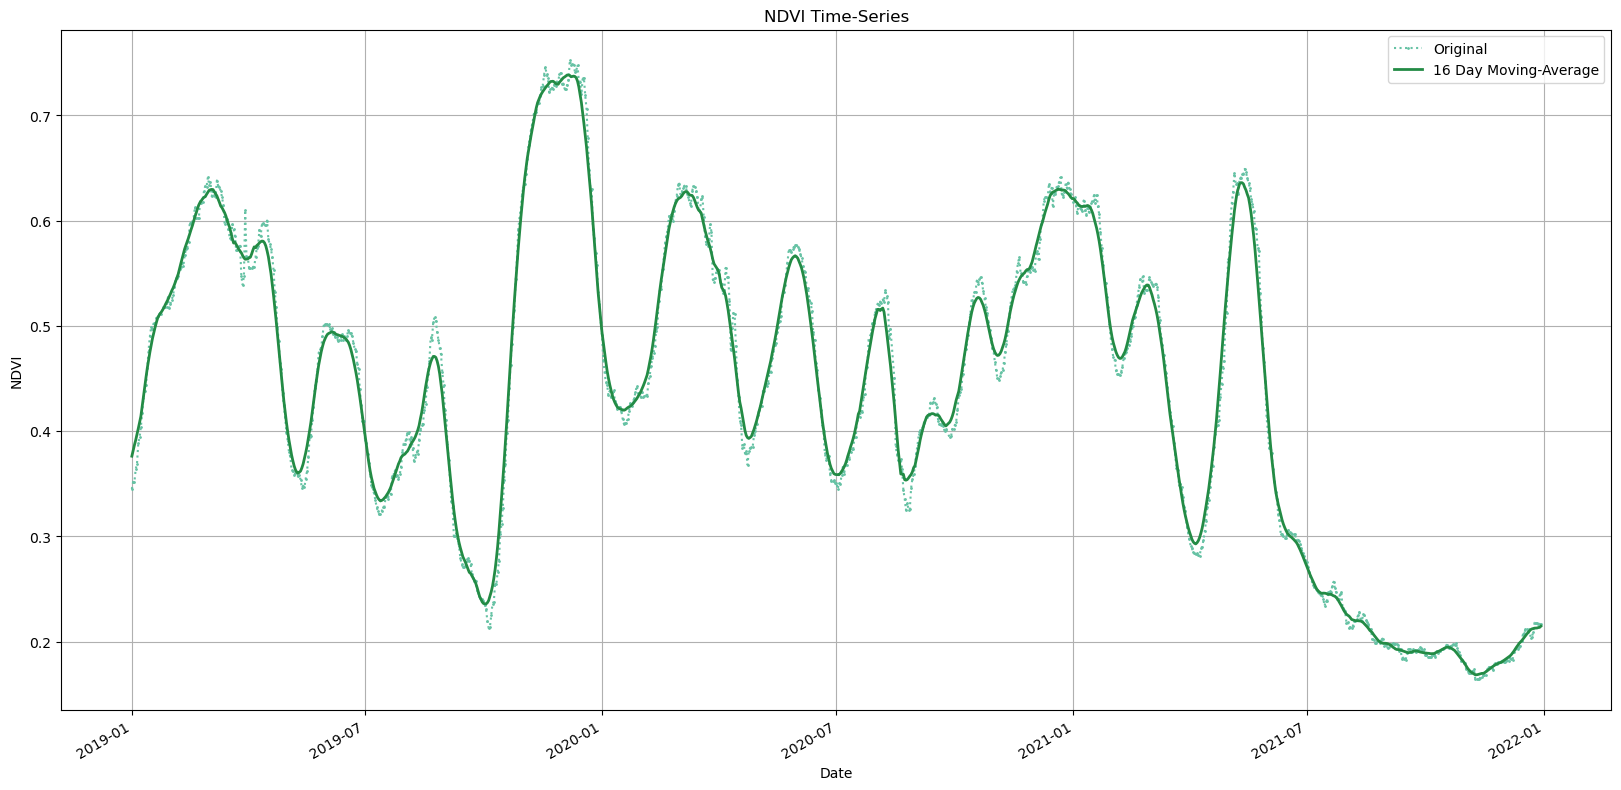

In [113]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
modis_smooth.plot(y='NDVI', kind='line', ax=ax, 
                  marker='o', markersize=1, color='#66c2a4', linestyle='dotted',
                  label='Original')
modis_smooth.plot(y='NDVI_smooth', kind='line', ax=ax,
                  marker='o', linewidth= 2, markersize=0, color='#238b45', 
                  label='{} Day Moving-Average'.format(window_size_days))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax.grid('on')

ax.set_title('NDVI Time-Series')
ax.set_ylabel('NDVI')

# Save the plot
output_folder = 'output'
output_path = os.path.join(output_folder, 'modis_ndvi_time_series.png')
plt.savefig(output_path)

plt.show()